In [296]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, LeaveOneOut
import xgboost
import shap
import sklearn
from xgboost import plot_importance, XGBClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.activations import softmax, relu
from sklearn.preprocessing import StandardScaler
from keras import backend as K
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import load_model
import joblib

<h3> All Data Neural Network SHAP Values</h3>
Analyzes the feature importance of the neural network for when trained on all of the data

In [219]:
#load model
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

Load in the data and split the data into train and test sets.

In [220]:
X = pd.read_csv('../data/labeled_clustered_data.csv')
X = X.drop(['Unnamed: 0_y','Unnamed: 0'], axis=1)
y = X.pop('label')
X_train, X_test, y_train, y_test = train_test_split(feat, labels, test_size=0.3, random_state=7)
print(X.shape, y.shape)

(36076, 64) (36076,)


Train model on data and graph the feature importance.

In [221]:
nn_model = load_model('alldata_model.h5', custom_objects={'sensitivity': sensitivity})
history = nn_model.fit(X_train, y_train)

4065/4065==============================] - 2s 396us/sample - loss: 2.9448 - sensitivity: 0.2827


In [284]:
shap.initjs()
def f_wrapper(X):
    return nn_model.predict(X)

X_train_summary = shap.kmeans(X, 1)
explainer = shap.KernelExplainer(f_wrapper, X_train_summary)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])



/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \










  0%|          | 0/1743 [00:00<?, ?it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  0%|          | 1/1743 [00:01<36:15,  1.25s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  0%|          | 2/1743 [00:02<34:27,  1.19s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) 

  1%|          | 20/1743 [00:22<28:43,  1.00s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  1%|          | 21/1743 [00:23<28:33,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  1%|▏         | 22/1743 [00:24<28:17,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.2

  2%|▏         | 40/1743 [00:42<28:34,  1.01s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  2%|▏         | 41/1743 [00:43<28:23,  1.00s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  2%|▏         | 42/1743 [00:43<28:18,  1.00it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.2

  3%|▎         | 60/1743 [01:01<26:44,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  3%|▎         | 61/1743 [01:02<26:58,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  4%|▎         | 62/1743 [01:03<26:53,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.2

  5%|▍         | 80/1743 [01:21<26:40,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  5%|▍         | 81/1743 [01:22<26:29,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  5%|▍         | 82/1743 [01:23<26:27,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.2

  6%|▌         | 100/1743 [01:40<26:10,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  6%|▌         | 101/1743 [01:41<25:57,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  6%|▌         | 102/1743 [01:42<26:13,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

  7%|▋         | 120/1743 [01:59<26:21,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  7%|▋         | 121/1743 [02:00<26:12,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  7%|▋         | 122/1743 [02:01<26:06,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

  8%|▊         | 140/1743 [02:19<26:17,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  8%|▊         | 141/1743 [02:20<26:08,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  8%|▊         | 142/1743 [02:20<25:53,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

  9%|▉         | 160/1743 [02:39<26:02,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  9%|▉         | 161/1743 [02:40<26:46,  1.02s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








  9%|▉         | 162/1743 [02:41<26:19,  1.00it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 10%|█         | 180/1743 [02:58<24:35,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 10%|█         | 181/1743 [02:59<24:41,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 10%|█         | 182/1743 [03:00<24:41,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 11%|█▏        | 200/1743 [03:17<24:13,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 12%|█▏        | 201/1743 [03:18<24:11,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 12%|█▏        | 202/1743 [03:19<24:14,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 13%|█▎        | 220/1743 [03:36<23:56,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 13%|█▎        | 221/1743 [03:37<23:58,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 13%|█▎        | 222/1743 [03:38<23:56,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 14%|█▍        | 240/1743 [03:56<25:05,  1.00s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 14%|█▍        | 241/1743 [03:57<24:33,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 14%|█▍        | 242/1743 [03:58<24:21,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 15%|█▍        | 260/1743 [04:15<23:17,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 15%|█▍        | 261/1743 [04:16<23:03,  1.07it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 15%|█▌        | 262/1743 [04:17<23:00,  1.07it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 16%|█▌        | 280/1743 [04:34<23:41,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 16%|█▌        | 281/1743 [04:35<23:27,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 16%|█▌        | 282/1743 [04:36<23:13,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 17%|█▋        | 300/1743 [04:53<22:39,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 17%|█▋        | 301/1743 [04:57<44:16,  1.84s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 17%|█▋        | 302/1743 [04:58<38:58,  1.62s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 18%|█▊        | 320/1743 [05:16<22:48,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 18%|█▊        | 321/1743 [05:17<22:49,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 18%|█▊        | 322/1743 [05:18<22:40,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 20%|█▉        | 340/1743 [05:38<27:29,  1.18s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 20%|█▉        | 341/1743 [05:39<26:17,  1.13s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 20%|█▉        | 342/1743 [05:40<25:26,  1.09s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 21%|██        | 360/1743 [06:03<39:22,  1.71s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 21%|██        | 361/1743 [06:05<37:51,  1.64s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 21%|██        | 362/1743 [06:06<37:46,  1.64s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 22%|██▏       | 380/1743 [06:28<28:35,  1.26s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 22%|██▏       | 381/1743 [06:29<27:45,  1.22s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 22%|██▏       | 382/1743 [06:30<26:52,  1.18s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 23%|██▎       | 400/1743 [06:52<27:45,  1.24s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 23%|██▎       | 401/1743 [06:53<26:33,  1.19s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 23%|██▎       | 402/1743 [06:55<26:01,  1.16s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 24%|██▍       | 420/1743 [07:12<20:45,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 24%|██▍       | 421/1743 [07:13<20:44,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 24%|██▍       | 422/1743 [07:14<20:40,  1.06it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 25%|██▌       | 440/1743 [07:31<20:20,  1.07it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 25%|██▌       | 441/1743 [07:32<20:15,  1.07it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 25%|██▌       | 442/1743 [07:33<20:13,  1.07it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 26%|██▋       | 460/1743 [07:51<25:24,  1.19s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 26%|██▋       | 461/1743 [07:52<25:05,  1.17s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 27%|██▋       | 462/1743 [07:53<27:15,  1.28s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 28%|██▊       | 480/1743 [08:15<21:55,  1.04s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 28%|██▊       | 481/1743 [08:16<21:23,  1.02s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 28%|██▊       | 482/1743 [08:17<20:57,  1.00it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 29%|██▊       | 500/1743 [08:35<20:06,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 29%|██▊       | 501/1743 [08:36<19:58,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 29%|██▉       | 502/1743 [08:37<19:55,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 30%|██▉       | 520/1743 [08:54<19:35,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 30%|██▉       | 521/1743 [08:55<19:36,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 30%|██▉       | 522/1743 [08:56<19:38,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 31%|███       | 540/1743 [09:13<19:17,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 31%|███       | 541/1743 [09:14<19:14,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 31%|███       | 542/1743 [09:15<19:07,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 32%|███▏      | 560/1743 [09:33<18:59,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 32%|███▏      | 561/1743 [09:34<18:53,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 32%|███▏      | 562/1743 [09:35<18:52,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 33%|███▎      | 580/1743 [09:52<18:40,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 33%|███▎      | 581/1743 [09:53<18:34,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 33%|███▎      | 582/1743 [09:54<18:28,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 34%|███▍      | 600/1743 [10:11<19:12,  1.01s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 34%|███▍      | 601/1743 [10:12<18:54,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 35%|███▍      | 602/1743 [10:13<18:39,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 36%|███▌      | 620/1743 [10:31<18:10,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 36%|███▌      | 621/1743 [10:32<18:06,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 36%|███▌      | 622/1743 [10:33<18:03,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 37%|███▋      | 640/1743 [10:50<18:00,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 37%|███▋      | 641/1743 [10:51<17:58,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 37%|███▋      | 642/1743 [10:52<17:45,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 38%|███▊      | 660/1743 [11:09<17:22,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 38%|███▊      | 661/1743 [11:10<17:30,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 38%|███▊      | 662/1743 [11:11<17:37,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 39%|███▉      | 680/1743 [11:29<17:38,  1.00it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 39%|███▉      | 681/1743 [11:30<18:22,  1.04s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 39%|███▉      | 682/1743 [11:31<18:25,  1.04s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 40%|████      | 700/1743 [11:48<16:43,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 40%|████      | 701/1743 [11:49<16:45,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 40%|████      | 702/1743 [11:50<16:39,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 41%|████▏     | 720/1743 [12:08<16:33,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 41%|████▏     | 721/1743 [12:09<16:36,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 41%|████▏     | 722/1743 [12:10<16:27,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 42%|████▏     | 740/1743 [12:27<16:12,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 43%|████▎     | 741/1743 [12:28<16:35,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 43%|████▎     | 742/1743 [12:29<16:25,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 44%|████▎     | 760/1743 [12:47<16:01,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 44%|████▎     | 761/1743 [12:48<15:59,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 44%|████▎     | 762/1743 [12:49<15:51,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 45%|████▍     | 780/1743 [13:06<15:31,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 45%|████▍     | 781/1743 [13:07<15:28,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 45%|████▍     | 782/1743 [13:08<15:26,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 46%|████▌     | 800/1743 [13:25<15:05,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 46%|████▌     | 801/1743 [13:26<15:06,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 46%|████▌     | 802/1743 [13:27<15:02,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 47%|████▋     | 820/1743 [13:45<14:45,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 47%|████▋     | 821/1743 [13:46<14:45,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 47%|████▋     | 822/1743 [13:47<14:40,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 48%|████▊     | 840/1743 [14:04<14:31,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 48%|████▊     | 841/1743 [14:05<14:28,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 48%|████▊     | 842/1743 [14:06<14:21,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 49%|████▉     | 860/1743 [14:23<14:04,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 49%|████▉     | 861/1743 [14:24<14:05,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 49%|████▉     | 862/1743 [14:25<14:07,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 50%|█████     | 880/1743 [14:43<14:09,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 51%|█████     | 881/1743 [14:44<14:02,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 51%|█████     | 882/1743 [14:45<13:53,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 52%|█████▏    | 900/1743 [15:02<13:30,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 52%|█████▏    | 901/1743 [15:03<13:27,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 52%|█████▏    | 902/1743 [15:04<13:25,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 53%|█████▎    | 920/1743 [15:21<13:08,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 53%|█████▎    | 921/1743 [15:22<13:08,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 53%|█████▎    | 922/1743 [15:23<13:04,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 54%|█████▍    | 940/1743 [15:41<13:57,  1.04s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 54%|█████▍    | 941/1743 [15:42<13:35,  1.02s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 54%|█████▍    | 942/1743 [15:42<13:16,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 55%|█████▌    | 960/1743 [16:00<12:32,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 55%|█████▌    | 961/1743 [16:01<12:29,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 55%|█████▌    | 962/1743 [16:02<12:28,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 56%|█████▌    | 980/1743 [16:19<12:18,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 56%|█████▋    | 981/1743 [16:20<12:17,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 56%|█████▋    | 982/1743 [16:21<12:14,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v

 57%|█████▋    | 1000/1743 [16:40<12:18,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 57%|█████▋    | 1001/1743 [16:41<12:11,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 57%|█████▋    | 1002/1743 [16:42<12:13,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 59%|█████▊    | 1020/1743 [16:59<11:36,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 59%|█████▊    | 1021/1743 [17:00<11:33,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 59%|█████▊    | 1022/1743 [17:01<11:28,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 60%|█████▉    | 1040/1743 [17:18<11:38,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 60%|█████▉    | 1041/1743 [17:19<11:43,  1.00s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 60%|█████▉    | 1042/1743 [17:20<11:34,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 61%|██████    | 1060/1743 [17:38<11:21,  1.00it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 61%|██████    | 1061/1743 [17:39<11:12,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 61%|██████    | 1062/1743 [17:40<11:05,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 62%|██████▏   | 1080/1743 [17:57<10:54,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 62%|██████▏   | 1081/1743 [17:58<10:52,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 62%|██████▏   | 1082/1743 [17:59<10:49,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 63%|██████▎   | 1100/1743 [18:16<10:43,  1.00s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 63%|██████▎   | 1101/1743 [18:17<10:33,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 63%|██████▎   | 1102/1743 [18:18<10:27,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 64%|██████▍   | 1120/1743 [18:35<09:58,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 64%|██████▍   | 1121/1743 [18:36<10:00,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 64%|██████▍   | 1122/1743 [18:37<10:03,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 65%|██████▌   | 1140/1743 [18:55<09:45,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 65%|██████▌   | 1141/1743 [18:56<09:41,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 66%|██████▌   | 1142/1743 [18:57<09:47,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 67%|██████▋   | 1160/1743 [19:14<09:28,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 67%|██████▋   | 1161/1743 [19:15<09:24,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 67%|██████▋   | 1162/1743 [19:16<09:19,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 68%|██████▊   | 1180/1743 [19:33<09:02,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 68%|██████▊   | 1181/1743 [19:34<09:00,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 68%|██████▊   | 1182/1743 [19:35<08:57,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 69%|██████▉   | 1200/1743 [19:52<08:38,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 69%|██████▉   | 1201/1743 [19:53<08:39,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 69%|██████▉   | 1202/1743 [19:54<08:35,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 70%|██████▉   | 1220/1743 [20:12<08:22,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 70%|███████   | 1221/1743 [20:13<08:25,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 70%|███████   | 1222/1743 [20:14<08:26,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 71%|███████   | 1240/1743 [20:31<08:04,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 71%|███████   | 1241/1743 [20:32<08:03,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 71%|███████▏  | 1242/1743 [20:33<07:59,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 72%|███████▏  | 1260/1743 [20:50<07:43,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 72%|███████▏  | 1261/1743 [20:51<07:41,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 72%|███████▏  | 1262/1743 [20:52<07:39,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 73%|███████▎  | 1280/1743 [21:09<07:23,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 73%|███████▎  | 1281/1743 [21:10<07:23,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 74%|███████▎  | 1282/1743 [21:11<07:22,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 75%|███████▍  | 1300/1743 [21:29<07:04,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 75%|███████▍  | 1301/1743 [21:30<07:02,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 75%|███████▍  | 1302/1743 [21:30<07:00,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 76%|███████▌  | 1320/1743 [21:48<06:51,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 76%|███████▌  | 1321/1743 [21:49<06:47,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 76%|███████▌  | 1322/1743 [21:50<06:44,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 77%|███████▋  | 1340/1743 [22:07<06:32,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 77%|███████▋  | 1341/1743 [22:08<06:27,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 77%|███████▋  | 1342/1743 [22:09<06:26,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 78%|███████▊  | 1360/1743 [22:26<06:09,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 78%|███████▊  | 1361/1743 [22:27<06:07,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 78%|███████▊  | 1362/1743 [22:28<06:07,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 79%|███████▉  | 1380/1743 [22:46<05:55,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 79%|███████▉  | 1381/1743 [22:47<05:51,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 79%|███████▉  | 1382/1743 [22:48<05:51,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 80%|████████  | 1400/1743 [23:05<05:31,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 80%|████████  | 1401/1743 [23:06<05:29,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 80%|████████  | 1402/1743 [23:07<05:28,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 81%|████████▏ | 1420/1743 [23:24<05:10,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 82%|████████▏ | 1421/1743 [23:25<05:08,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 82%|████████▏ | 1422/1743 [23:26<05:07,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 83%|████████▎ | 1440/1743 [23:44<04:52,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 83%|████████▎ | 1441/1743 [23:44<04:51,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 83%|████████▎ | 1442/1743 [23:45<04:49,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 84%|████████▍ | 1460/1743 [24:03<04:30,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 84%|████████▍ | 1461/1743 [24:04<04:30,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 84%|████████▍ | 1462/1743 [24:05<04:29,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 85%|████████▍ | 1480/1743 [24:22<04:12,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 85%|████████▍ | 1481/1743 [24:23<04:11,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 85%|████████▌ | 1482/1743 [24:24<04:09,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 86%|████████▌ | 1500/1743 [24:41<04:01,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 86%|████████▌ | 1501/1743 [24:42<04:01,  1.00it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 86%|████████▌ | 1502/1743 [24:43<03:57,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 87%|████████▋ | 1520/1743 [25:00<03:40,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 87%|████████▋ | 1521/1743 [25:01<03:37,  1.02it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 87%|████████▋ | 1522/1743 [25:02<03:34,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 88%|████████▊ | 1540/1743 [25:20<03:26,  1.01s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 88%|████████▊ | 1541/1743 [25:21<03:31,  1.04s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 88%|████████▊ | 1542/1743 [25:22<03:29,  1.04s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 90%|████████▉ | 1560/1743 [25:41<03:06,  1.02s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 90%|████████▉ | 1561/1743 [25:42<03:04,  1.02s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 90%|████████▉ | 1562/1743 [25:43<03:05,  1.03s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 91%|█████████ | 1580/1743 [26:00<02:38,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 91%|█████████ | 1581/1743 [26:01<02:36,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 91%|█████████ | 1582/1743 [26:02<02:34,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 92%|█████████▏| 1600/1743 [26:19<02:19,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 92%|█████████▏| 1601/1743 [26:20<02:17,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 92%|█████████▏| 1602/1743 [26:21<02:19,  1.01it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 93%|█████████▎| 1620/1743 [26:38<01:59,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 93%|█████████▎| 1621/1743 [26:39<02:04,  1.02s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 93%|█████████▎| 1622/1743 [26:41<02:10,  1.08s/it]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 94%|█████████▍| 1640/1743 [26:58<01:39,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 94%|█████████▍| 1641/1743 [26:59<01:38,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 94%|█████████▍| 1642/1743 [27:00<01:38,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 95%|█████████▌| 1660/1743 [27:17<01:19,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 95%|█████████▌| 1661/1743 [27:18<01:19,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 95%|█████████▌| 1662/1743 [27:19<01:20,  1.00it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 96%|█████████▋| 1680/1743 [27:37<01:00,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 96%|█████████▋| 1681/1743 [27:38<00:59,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 97%|█████████▋| 1682/1743 [27:39<00:58,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 98%|█████████▊| 1700/1743 [27:56<00:41,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 98%|█████████▊| 1701/1743 [27:57<00:40,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 98%|█████████▊| 1702/1743 [27:58<00:39,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

 99%|█████████▊| 1720/1743 [28:15<00:22,  1.03it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 99%|█████████▊| 1721/1743 [28:16<00:21,  1.04it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








 99%|█████████▉| 1722/1743 [28:17<00:20,  1.05it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

100%|█████████▉| 1740/1743 [28:34<00:02,  1.07it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








100%|█████████▉| 1741/1743 [28:35<00:01,  1.08it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \








100%|█████████▉| 1742/1743 [28:36<00:00,  1.08it/s]/Users/Jerome/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version

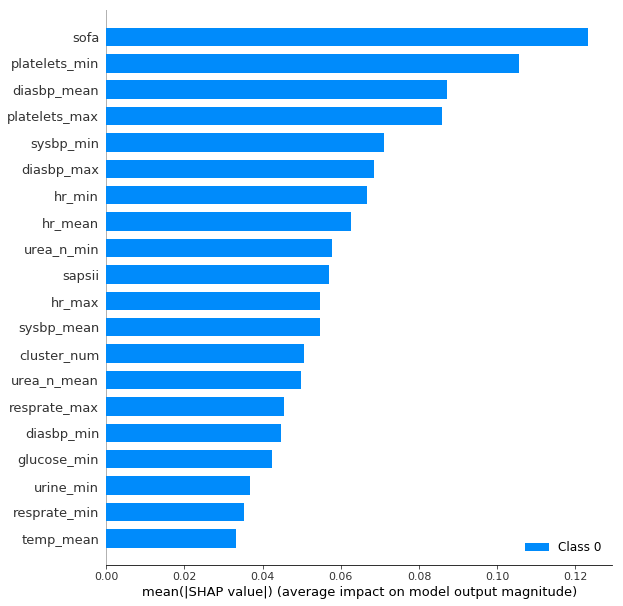

In [305]:
X_train_summary = shap.kmeans(X, 10)
explainer = shap.KernelExplainer(f_wrapper, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("All Data Feature Importances")
plt.tight_layout()
plt.savefig("all_data_feature_importance.png")
plt.clf()

<H3> XGBoost </H3>
Load in the data per cluster as well as the models per cluster.

In [176]:
data = pd.read_csv('../data/labeled_clustered_data.csv')
df_0 = data[(data[['cluster_num']] == 0).any(axis=1)]
df_0_label=df_0.pop('label')
df_1 = data[(data[['cluster_num']] == 1).any(axis=1)]
df_1_label=df_1.pop('label')
df_2 = data[(data[['cluster_num']] == 2).any(axis=1)]
df_2_label=df_2.pop('label')
dfs = [df_0, df_1, df_2]
dfs_labels = [df_0_label, df_1_label, df_2_label]
models = [joblib.load('xg_boost_cluster_0.dat'), joblib.load('xg_boost_cluster_1.dat'), joblib.load('xg_boost_cluster_2.dat')]

/Users/Jerome/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


For each cluster, fit the model on the partioned data and the calcuate the SHAP values.

In [307]:
cluster_num = 0
for feat, labels, model in zip(dfs, dfs_labels, models):
    # create a train/test split
    feat = feat.drop(['Unnamed: 0', 'Unnamed: 0_y'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(feat, labels, test_size=0.3, random_state=7)
    xgb_train = xgboost.DMatrix(X_train, label=y_train)
    xgb_test = xgboost.DMatrix(X_test, label=y_test)

    model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric='logloss',
            verbose=False)
    xgb_full = xgboost.DMatrix(feat, label=labels)
    shap_values = shap.TreeExplainer(model).shap_values(X_test)
#     shap.summary_plot(shap_values, feat)
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
#     plt.title("Cluster " + str(cluster_num) + " Feature Importances")
    plt.title("All Data Feature Importances")
    plt.savefig("all_data_feat_importance.png")
    plt.tight_layout()
    plt.clf()
    cluster_num += 1